<h1 style="background-color:#EBF5FB; color:#2471A3;">Intro</h1>

In this notebook, I am exploring factors related to employee turnover. I am using the following dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data. This dataset is fictional, created by IBM data scientists.

<h1 style="background-color:#EBF5FB; color:#2471A3 ;">Understanding the problem statment and business case</h1>

<p>Hiring an employee requires capital, time and skills. The average cost of hiring a new implyee equals 1.5 to 2 times the emplyee's anual salary. Here I investigate factors related to employee attrition in order to better understand and prevent current employee turnover.
<a href="https://toggl.com/blog/cost-of-hiring-an-employee">Read more here.</a></p>

<h1 style="background-color:#EBF5FB; color:#2471A3;">Library imports</h1>


In [644]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, kstest
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

<h1 style="background-color:#EBF5FB; color:#2471A3;">Getting to know the dataset</h1>

- Exploring dataset features and their data types.
- Cleaning of duplicates, missing values and uninformative features.
- Performing initial exploration of data distribution normality of the dataset.

In [645]:
# Loading the dataset
employee_df = pd.read_csv('/Users/dominika/Documents/Coding_learning/Business_projects/1. Human Resources Data/Human_Resources.csv')

In [646]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<p style="background-color:#FDEBD0;"><b>Comment:</b> 35 features in total, each contains 1470 data points</p>

In [647]:
employee_df.sample(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
699,52,No,Travel_Rarely,1053,Research & Development,1,2,Life Sciences,1,976,...,2,80,1,26,2,2,9,8,7,8
605,38,No,Travel_Frequently,471,Research & Development,12,3,Life Sciences,1,837,...,3,80,1,13,3,2,4,3,1,2
75,31,No,Travel_Rarely,746,Research & Development,8,4,Life Sciences,1,98,...,4,80,0,11,2,3,11,7,1,8
764,28,No,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,...,2,80,0,1,5,3,1,0,0,0
649,53,No,Travel_Rarely,102,Research & Development,23,4,Life Sciences,1,901,...,3,80,0,33,0,3,12,9,3,8
583,34,No,Travel_Rarely,1111,Sales,8,2,Life Sciences,1,808,...,2,80,1,6,1,3,3,2,1,2


In [648]:
# Recoding categorical variables: 'Attritition' , 'overtime' , 'Over18'
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x=='Y' else 0)

In [649]:
# Checking for duplicates
employee_df.duplicated().sum()

0

<Axes: >

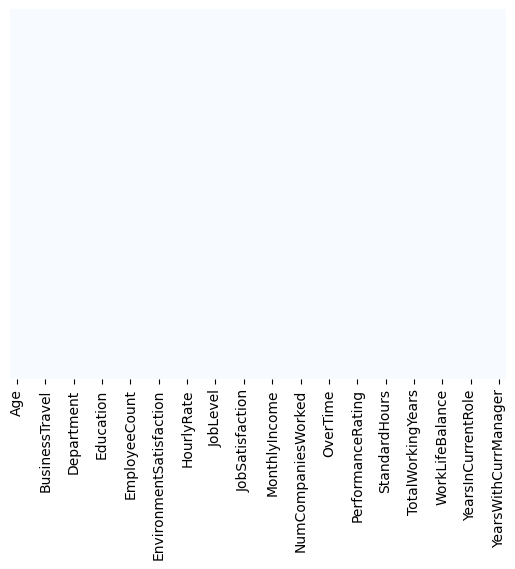

In [650]:
# Checking for missing data
sns.heatmap(employee_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

<p style="background-color:#FDEBD0;"><b>Comment:</b> The dataset has no duplicates or missing values that would need to be handled before modelling.</p>

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

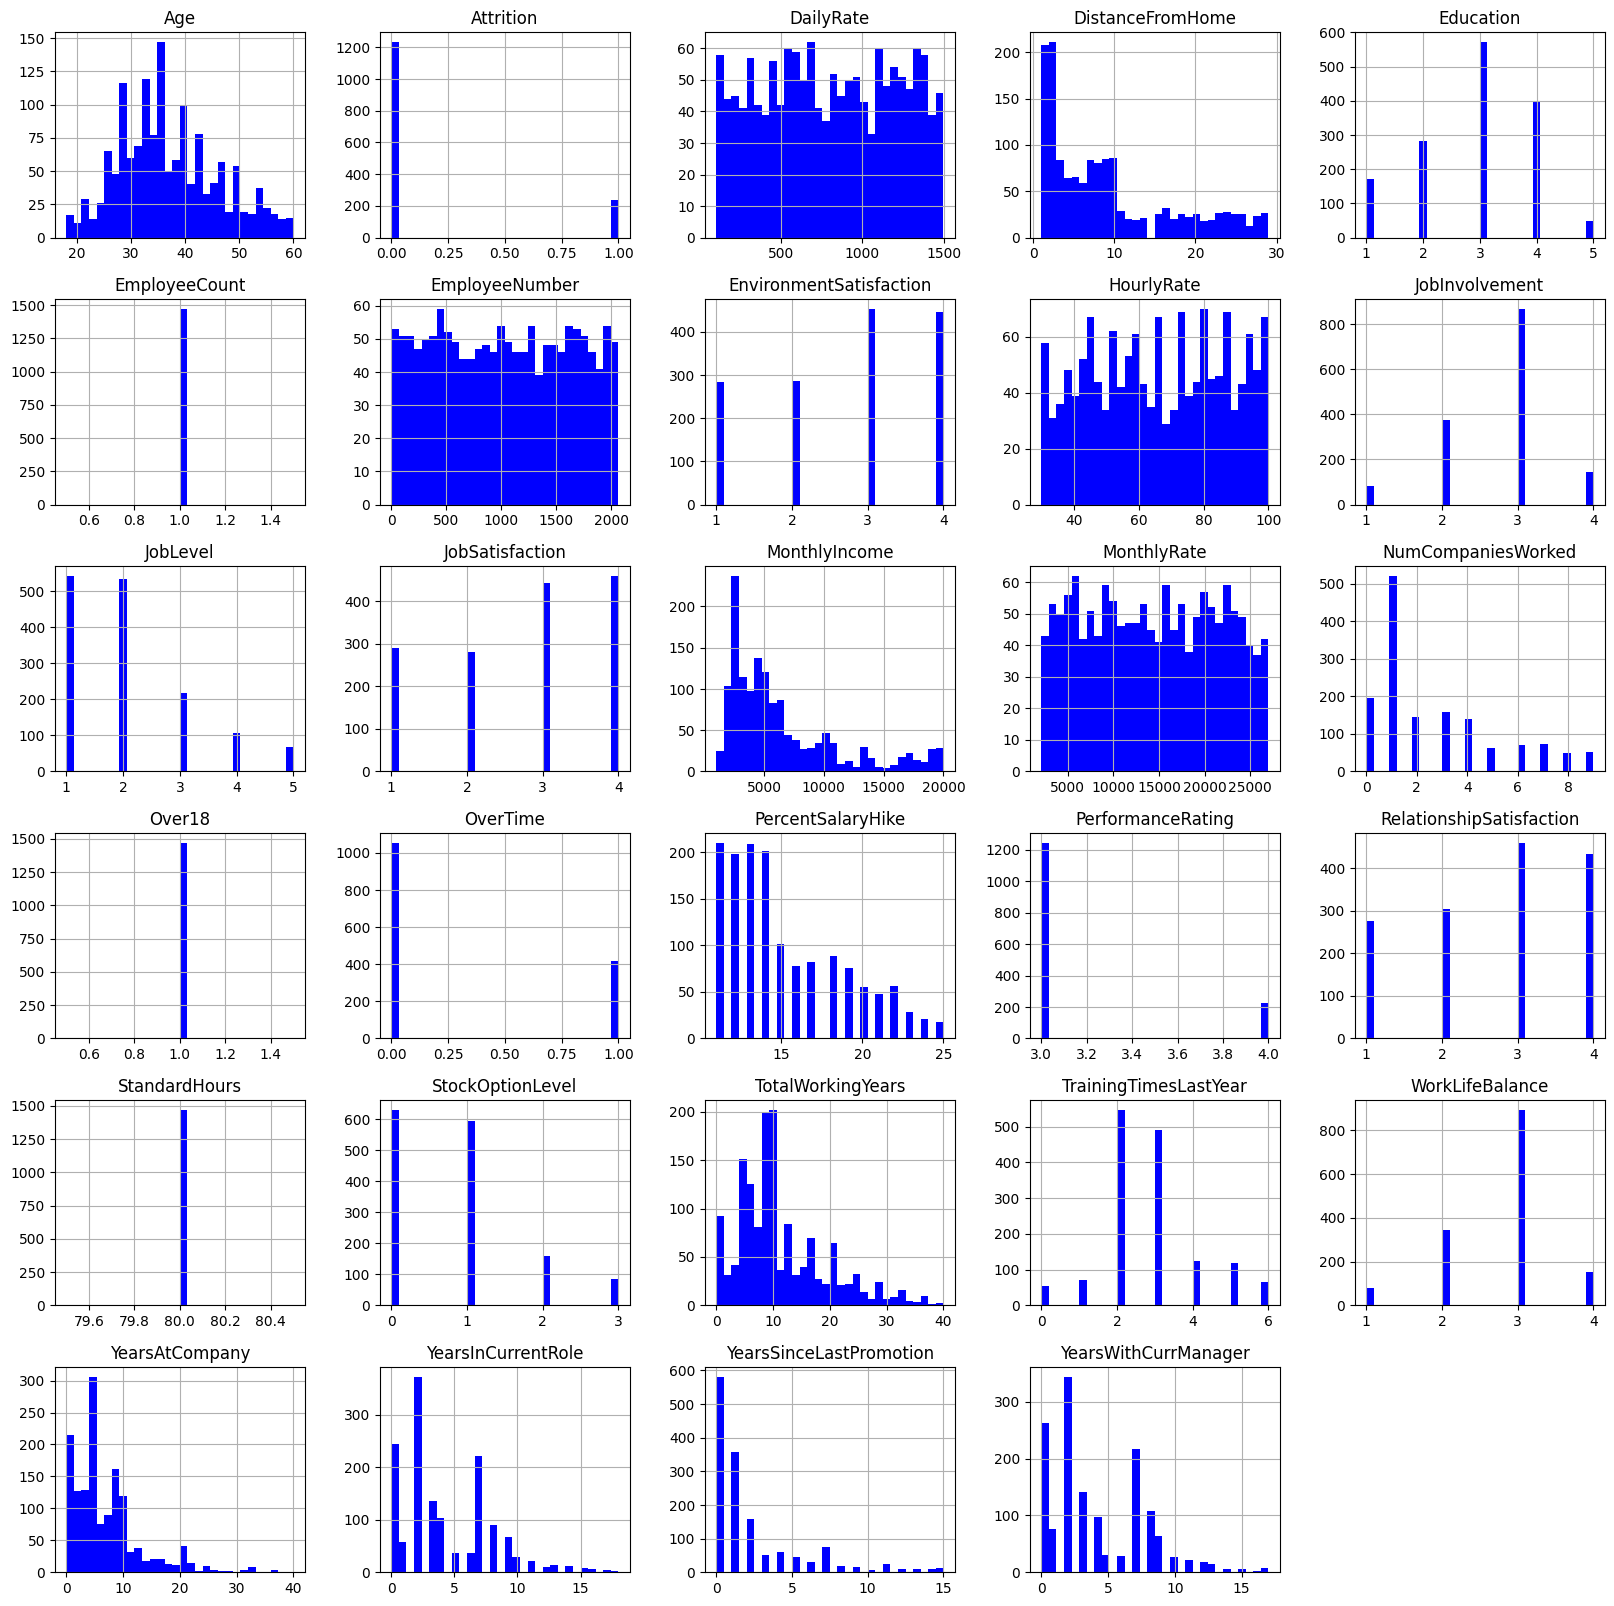

In [651]:
# Explring the informativeness of the individual features 
employee_df.hist(bins=30, figsize=(20,20), color='b')

<p style="background-color:#FDEBD0;"><b>Comment:</b> Features 'EmployeeCount', 'Standardhours', 'EmployeeNumber', and 'Over18' are not informative, as they are either constant or unique values, thus cannot provide insights into the differences between the employees who leave or stay in the company.</p>

In [652]:
employee_df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [653]:
# Print general descriptive stats
def get_full_descriptives(df):
    descriptive_stats = df.describe()
    skewness = df.apply(skew)
    kurt = df.apply(kurtosis)
    descriptive_stats.loc['skewness'] = skewness
    descriptive_stats.loc['kurtosis'] = kurt
    return descriptive_stats.round(1)

In [654]:
descriptives_df = employee_df.drop(employee_df.select_dtypes(include=['object']).columns, axis=1)
get_full_descriptives(descriptives_df)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,...,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,0.2,802.5,9.2,2.9,2.7,65.9,2.7,2.1,2.7,...,3.2,2.7,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,0.4,403.5,8.1,1.0,1.1,20.3,0.7,1.1,1.1,...,0.4,1.1,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,0.0,102.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,...,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,0.0,465.0,2.0,2.0,2.0,48.0,2.0,1.0,2.0,...,3.0,2.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,0.0,802.0,7.0,3.0,3.0,66.0,3.0,2.0,3.0,...,3.0,3.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,0.0,1157.0,14.0,4.0,4.0,83.8,3.0,3.0,4.0,...,3.0,4.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1.0,1499.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,...,4.0,4.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0
skewness,0.4,1.8,-0.0,1.0,-0.3,-0.3,-0.0,-0.5,1.0,-0.3,...,1.9,-0.3,1.0,1.1,0.6,-0.6,1.8,0.9,2.0,0.8
kurtosis,-0.4,1.4,-1.2,-0.2,-0.6,-1.2,-1.2,0.3,0.4,-1.2,...,1.7,-1.2,0.4,0.9,0.5,0.4,3.9,0.5,3.6,0.2


<p style="background-color:#FDEBD0;"><b>Comment:</b> Several features are non-normally distributed, e.g., YearsSinceLastPromotion, 
    YearsAtCompany, TotalWorkingYears, MonthlyIncome, HourlyRate, DailyRate</p>

<h1 style="background-color:#EBF5FB; color:#2471A3;">EDA</h1>

EDA lays the foundation for understanding how dataset features are interrelated, which is crucial for two main reasons:
- Model Selection: It helps in selecting an appropriate model by ensuring that the data adheres to the assumptions of the chosen model, thereby enhancing model accuracy.
- Relationship Exploration: It provides an initial comprehension of the relationships between features and between features and the target variable, aiding in the formulation of hypotheses and guiding subsequent analysis steps.

<h3 style="background-color:#EBF5FB; color:#2471A3;">Exploring data normality by Attrition</h3>
<p style="color:#2471A3;">Assessing the normality of independent factor distributions by Attrition type ('left' vs. 'stayed') in the EDA provides insights into how these factors vary between departing and retained employees, aiding in the identification of potential influential trends.</p>

In [655]:
# Checking for dataset imbalance
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [656]:
# Count the number of employees who stayed and left
left_num = left_df.size
stayed_num = stayed_df.size
percent = round(left_num * 100 / (stayed_num + left_num), 2)
print(f'Stayed: {stayed_num}, Left: {left_num}')
print(f'The percentage of people who left: {percent}%')

Stayed: 38223, Left: 7347
The percentage of people who left: 16.12%


<p style="background-color:#FDEBD0;"><b>Comment:</b> The target feature - Attrition - is unbalanced. It is advisable to use techniques to handle the imbalance, e.g. the SMOTE technique.</p>

In [657]:
df = left_df.drop(left_df.select_dtypes(include=['object']).columns, axis=1)
get_full_descriptives(df)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/apply.py:907: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.f(v)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/apply.py:907: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.f(v)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,...,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0
mean,33.6,1.0,750.4,10.6,2.8,2.5,65.6,2.5,1.6,2.5,...,3.2,2.6,0.5,8.2,2.6,2.7,5.1,2.9,1.9,2.9
std,9.7,0.0,401.9,8.5,1.0,1.2,20.1,0.8,0.9,1.1,...,0.4,1.1,0.9,7.2,1.3,0.8,5.9,3.2,3.2,3.1
min,18.0,1.0,103.0,1.0,1.0,1.0,31.0,1.0,1.0,1.0,...,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,28.0,1.0,408.0,3.0,2.0,1.0,50.0,2.0,1.0,1.0,...,3.0,2.0,0.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0
50%,32.0,1.0,699.0,9.0,3.0,3.0,66.0,3.0,1.0,3.0,...,3.0,3.0,0.0,7.0,2.0,3.0,3.0,2.0,1.0,2.0
75%,39.0,1.0,1092.0,17.0,4.0,4.0,84.0,3.0,2.0,3.0,...,3.0,4.0,1.0,10.0,3.0,3.0,7.0,4.0,2.0,5.0
max,58.0,1.0,1496.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,...,4.0,4.0,3.0,40.0,6.0,4.0,40.0,15.0,15.0,14.0
skewness,0.7,NaN,0.2,0.6,-0.3,-0.0,0.1,-0.5,1.5,-0.0,...,1.9,-0.2,1.7,1.7,0.3,-0.5,2.7,1.3,2.2,1.0
kurtosis,-0.1,NaN,-1.1,-0.9,-0.6,-1.5,-1.2,-0.3,2.1,-1.4,...,1.6,-1.3,2.0,3.7,0.6,-0.2,9.4,1.5,4.7,0.2


In [658]:
df = stayed_df.drop(stayed_df.select_dtypes(include=['object']).columns, axis=1)
get_full_descriptives(df)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,...,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0
mean,37.6,0.0,812.5,8.9,2.9,2.8,66.0,2.8,2.1,2.8,...,3.2,2.7,0.8,11.9,2.8,2.8,7.4,4.5,2.2,4.4
std,8.9,0.0,403.2,8.0,1.0,1.1,20.4,0.7,1.1,1.1,...,0.4,1.1,0.8,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,0.0,102.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,...,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,31.0,0.0,477.0,2.0,2.0,2.0,48.0,2.0,1.0,2.0,...,3.0,2.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,0.0,817.0,7.0,3.0,3.0,66.0,3.0,2.0,3.0,...,3.0,3.0,1.0,10.0,3.0,3.0,6.0,3.0,1.0,3.0
75%,43.0,0.0,1176.0,13.0,4.0,4.0,83.0,3.0,3.0,4.0,...,3.0,4.0,1.0,16.0,3.0,3.0,10.0,7.0,3.0,7.0
max,60.0,0.0,1499.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,...,4.0,4.0,3.0,38.0,6.0,4.0,37.0,18.0,15.0,17.0
skewness,0.4,NaN,-0.0,1.0,-0.3,-0.4,-0.0,-0.5,1.0,-0.4,...,1.9,-0.3,0.9,1.1,0.6,-0.5,1.7,0.9,1.9,0.8
kurtosis,-0.4,NaN,-1.2,-0.0,-0.6,-1.1,-1.2,0.4,0.2,-1.2,...,1.7,-1.2,0.3,0.7,0.4,0.5,3.3,0.4,3.4,0.1


In [659]:
def shapiro_test_per_group(left_df, stayed_df):
    columns = left_df.select_dtypes(exclude=['object']).columns
    normality_results = {}
    for column in columns:
        left_stat, left_p = shapiro(left_df[column])
        stayed_stat, stayed_p = shapiro(stayed_df[column])
        normality_results[column] = {
            'Statistic (left)': left_stat, 
            'p-value (left)': left_p, 
            'Normality (left)': left_p > 0.05,
            'Statistic (stayed)': stayed_stat, 
            'p-value (stayed)': stayed_p, 
            'Normality (stayed)': stayed_p > 0.05
        }

    return pd.DataFrame(normality_results).T

In [660]:
shapiro_test_per_group(left_df, stayed_df)

/var/folders/0_/lvx1v779749gfqp3fhzbmbh80000gn/T/ipykernel_75175/3213092832.py:5: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  left_stat, left_p = shapiro(left_df[column])
/var/folders/0_/lvx1v779749gfqp3fhzbmbh80000gn/T/ipykernel_75175/3213092832.py:6: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  stayed_stat, stayed_p = shapiro(stayed_df[column])


,Statistic (left),p-value (left),Normality (left),Statistic (stayed),p-value (stayed),Normality (stayed)
Age,0.945707,0.0,False,0.978215,0.0,False
Attrition,1.0,1.0,True,1.0,1.0,True
DailyRate,0.949697,0.0,False,0.954174,0.0,False
DistanceFromHome,0.895944,0.0,False,0.853477,0.0,False
Education,0.886046,0.0,False,0.896686,0.0,False
EnvironmentSatisfaction,0.837141,0.0,False,0.84918,0.0,False
HourlyRate,0.956472,0.000001,False,0.954055,0.0,False
JobInvolvement,0.820738,0.0,False,0.80429,0.0,False
JobLevel,0.701292,0.0,False,0.834703,0.0,False
JobSatisfaction,0.850929,0.0,False,0.842537,0.0,False


<p style="background-color:#FDEBD0;"><b>Comment:</b> Data is non-normally distributed across the Attrition category. This means that interpreting mean differences between Attrition categories may lead to a bias. Therefore, non-normally distributed features can be a problem for some models, particularly logistic regression, which assumes normality. Random forests and neural networks are more robust to non-normality, but it's still a good idea to normalize the features to improve model performance. </p>

<h3 style="background-color:#EBF5FB; color:#2471A3;">Exploring relationships between features</h3>

<p style="color:#2471A3;">Conducting correlation analysis among the dataset features to unveil potential linear associations, thereby facilitating a comprehensive exploration of interrelationships within the dataset.</p>

In [661]:
correlation_matrix = employee_df.corr(method='kendall')
# Employing a nonparametric Kendall's method due to non-normally distributed data and it's robustness to ties in data

/var/folders/0_/lvx1v779749gfqp3fhzbmbh80000gn/T/ipykernel_75175/516757879.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = employee_df.corr(method='kendall')


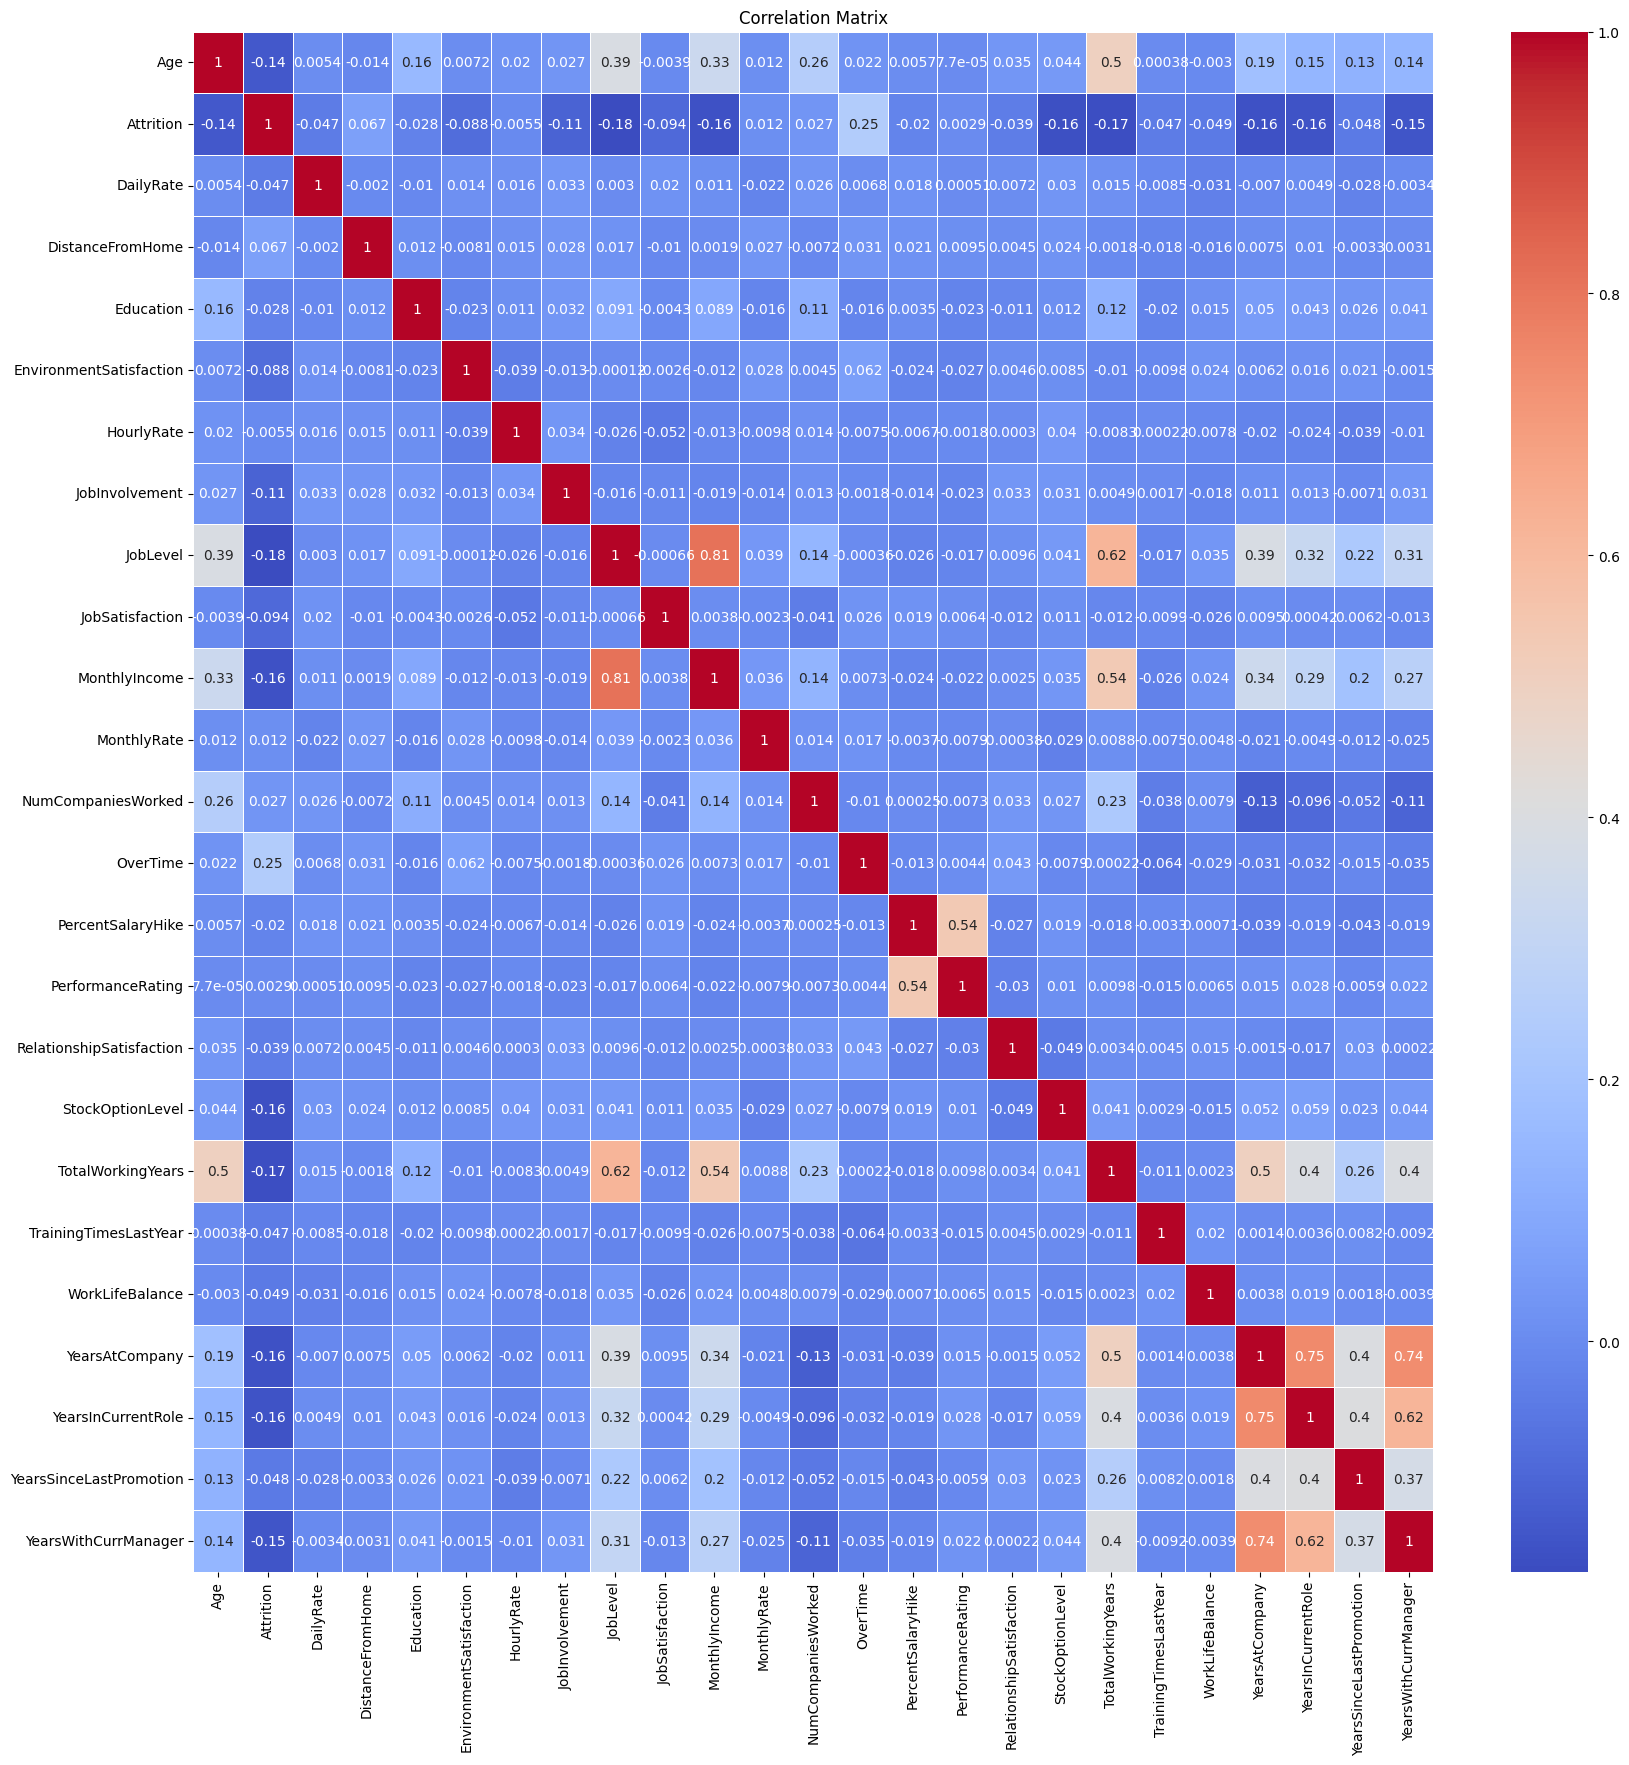

In [662]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<p style="color:#F39C12;">Comment:<ul style="background-color:#FDEBD0;">
    <li>There is a strong correlation between YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager. All of these features correlate at the same with Attrition. Given these observations, these features could be condensed together.</li>
    <li>Overall, there is minimal collinearity between features, such that dimensionality reduction technique does not need to be considered before building a model to reduce redundancy.</li>
    <li>OverTime is a single positive indicator of Attrition. There is a small positive tendency between DistanceFromHome and Attrition.</li>
    <li>Attrition is moderately negatively correlated to MonthlyIncome, Age, JobLevel, and TotalWorkingYears. All of these factors are strongly positively related to each other.</li>
    <li>NumberOfCompaniesWorked is related to both Age and TotalWorkingYears, but appears to have minimal relation to Attrition.</li></ul</p>
    

<hr>

<p style="color:#2471A3;">Further elucidating the observed relationships among the aforementioned features by employing violin plots, thereby enhancing our understanding of the disparity in mean values across different Attrition categories and the distributional characteristics surrounding these means.</p>

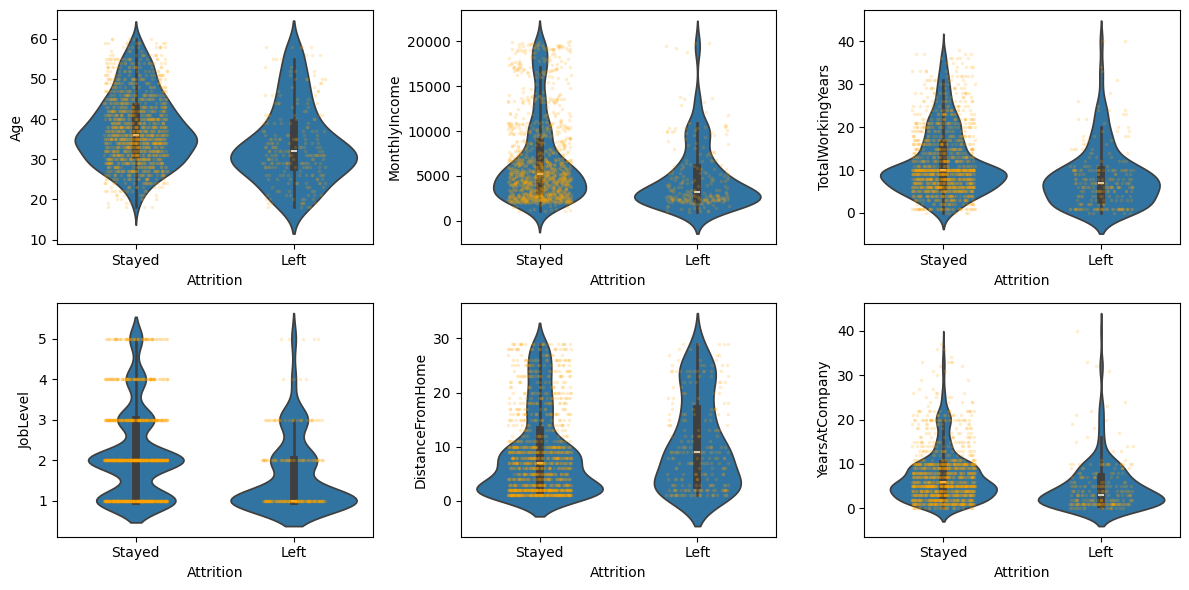

In [663]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

sns.violinplot(x='Attrition', y='Age', data=employee_df, ax=axs[0,0])
sns.stripplot(x='Attrition', y='Age', data=employee_df, color="orange", jitter=0.2, alpha=.2, size=2.5, ax=axs[0,0])
axs[0,0].set_xticks([0,1])
axs[0,0].set_xticklabels(['Stayed', 'Left'])

sns.violinplot(x='Attrition', y='MonthlyIncome', data=employee_df, ax=axs[0,1])
sns.stripplot(x='Attrition', y='MonthlyIncome', data=employee_df, color="orange", jitter=0.2, alpha=.2, size=2.5, ax=axs[0,1])
axs[0,1].set_xticks([0,1])
axs[0,1].set_xticklabels(['Stayed', 'Left'])

sns.violinplot(x='Attrition', y='TotalWorkingYears', data=employee_df, ax=axs[0,2])
sns.stripplot(x='Attrition', y='TotalWorkingYears', data=employee_df, color="orange", jitter=0.2, alpha=.2, size=2.5, ax=axs[0,2])
axs[0,2].set_xticks([0,1])
axs[0,2].set_xticklabels(['Stayed', 'Left'])

sns.violinplot(x='Attrition', y='JobLevel', data=employee_df, ax=axs[1,0])
sns.stripplot(x='Attrition', y='JobLevel', data=employee_df, color="orange", jitter=0.2, alpha=.2, size=2.5, ax=axs[1,0])
axs[1,0].set_xticks([0,1])
axs[1,0].set_xticklabels(['Stayed', 'Left'])

sns.violinplot(x='Attrition', y='DistanceFromHome', data=employee_df, ax=axs[1,1])
sns.stripplot(x='Attrition', y='DistanceFromHome', data=employee_df, color="orange", jitter=0.2, alpha=.2, size=2.5, ax=axs[1,1])
axs[1,1].set_xticks([0,1])
axs[1,1].set_xticklabels(['Stayed', 'Left'])

sns.violinplot(x='Attrition', y='YearsAtCompany', data=employee_df, ax=axs[1,2])
sns.stripplot(x='Attrition', y='YearsAtCompany', data=employee_df, color="orange", jitter=0.2, alpha=.2, size=2.5, ax=axs[1,2])
axs[1,2].set_xticks([0,1])
axs[1,2].set_xticklabels(['Stayed', 'Left'])

plt.tight_layout()
plt.show()

<hr>

<p style="color:#2471A3;">Exploring the relationship between categorical variables and Attrition (not captured in correlation analysis).</p>

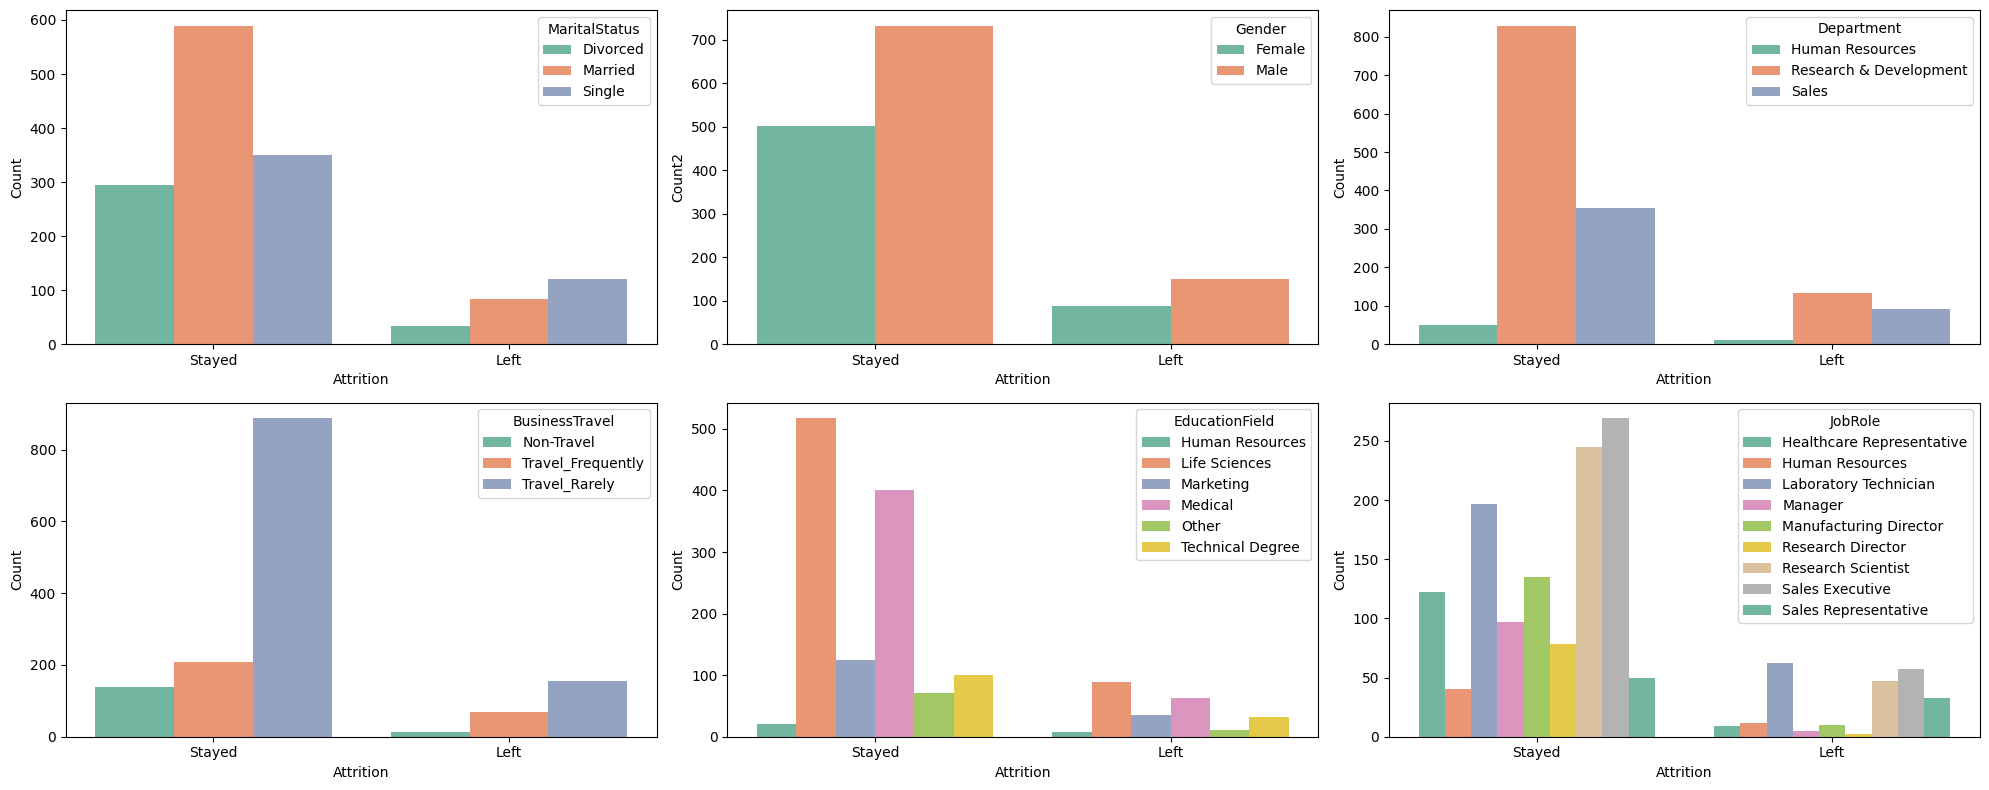

In [664]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

counts = employee_df.groupby(['Attrition', 'MaritalStatus']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='MaritalStatus', data=counts, ax=axs[0,0], palette='Set2')
axs[0,0].set_xticks([0,1])
axs[0,0].set_xticklabels(['Stayed', 'Left'])

counts = employee_df.groupby(['Attrition', 'Gender']).size().reset_index(name='Count2')
sns.barplot(x='Attrition', y='Count2', hue='Gender', data=counts, ax=axs[0,1], palette='Set2')
axs[0,1].set_xticks([0,1])
axs[0,1].set_xticklabels(['Stayed', 'Left'])

counts = employee_df.groupby(['Attrition', 'Department']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='Department', data=counts, ax=axs[0,2], palette='Set2')
axs[0,2].set_xticks([0,1])
axs[0,2].set_xticklabels(['Stayed', 'Left'])

counts = employee_df.groupby(['Attrition', 'BusinessTravel']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='BusinessTravel', data=counts,ax=axs[1,0], palette='Set2')
axs[1,0].set_xticks([0,1])
axs[1,0].set_xticklabels(['Stayed', 'Left'])

counts = employee_df.groupby(['Attrition', 'EducationField']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='EducationField', data=counts,ax=axs[1,1], palette='Set2')
axs[1,1].set_xticks([0,1])
axs[1,1].set_xticklabels(['Stayed', 'Left'])

counts = employee_df.groupby(['Attrition', 'JobRole']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='JobRole', data=counts, ax=axs[1,2],palette='Set2')
axs[1,2].set_xticks([0,1])
axs[1,2].set_xticklabels(['Stayed', 'Left'])

plt.tight_layout()
plt.show()

<p style="background-color:#FDEBD0;"><b>Comment:</b> BusinessTravel, Department, Gender, JobRole and EducationField distributions across Attrition categories is similar. The distribution of MaritalStatus between employees who left and who stayed is slightly different, showing that there is slightly higher number of single people in the 'left' group compared to married or divorced people.</p>

<h1 style="background-color:#EBF5FB; color:#2471A3;">Data preprocessing</h1>

<h3 style="background-color:#EBF5FB; color:#2471A3;">One-hot encoding of categorical variables</h3>

In [665]:
# Select all categorical variables
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [666]:
X_cat = pd.get_dummies(data=X_cat, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

In [667]:
X_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [668]:
X_cat.shape

(1470, 26)

In [669]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [670]:
# Select all numerical variables, but the target 'Atrittion'
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [671]:
X = pd.concat([X_numerical, X_cat], axis = 1)
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,0,1,0


In [672]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

<h3 style="background-color:#EBF5FB; color:#2471A3;">Train-test split</h3>

In [673]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123, stratify=y)

In [674]:
X_train.shape

(1102, 50)

In [675]:
X_test.shape

(368, 50)

In [676]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
505,26,991,6,3,3,71,3,1,4,2659,...,1,0,0,0,0,0,0,0,1,0
37,35,890,2,3,4,97,3,1,4,2014,...,0,0,0,0,0,0,1,0,1,0
1350,27,511,2,2,1,89,4,2,3,6500,...,0,0,0,0,0,1,0,0,0,1
1014,31,182,8,5,1,93,3,4,2,16422,...,0,0,0,1,0,0,0,0,0,1
617,44,625,4,3,4,50,3,2,2,5933,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,60,1499,28,3,3,80,2,3,1,10266,...,0,0,0,0,0,1,0,0,1,0
792,33,827,29,4,1,54,2,2,3,4508,...,0,0,0,0,1,0,0,0,0,1
826,38,433,1,3,3,37,4,1,3,2844,...,0,0,0,0,0,0,0,0,1,0
1447,36,301,15,4,4,88,1,2,4,5406,...,0,0,0,0,0,1,0,1,0,0


<h3 style="background-color:#EBF5FB; color:#2471A3;">Scaling the data</h3>

In [677]:
num_cols_names = X_numerical.columns
num_cols_names

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [678]:
scaler = StandardScaler()

#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(X_train[num_cols_names]), 
                                     columns=num_cols_names, index= X_train.index)

In [679]:
#Integrate scaled values to the training set
for col in num_cols_names:
    X_train[col] = scaled_numfeats_train[col]

In [680]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
505,-1.209395,0.429722,-0.402338,0.083280,0.270958,0.248188,0.407922,-0.960087,1.152047,-0.814550,...,1,0,0,0,0,0,0,0,1,0
37,-0.208245,0.178854,-0.890908,0.083280,1.186895,1.525551,0.407922,-0.960087,1.152047,-0.954673,...,0,0,0,0,0,0,1,0,1,0
1350,-1.098157,-0.762521,-0.890908,-0.882772,-1.560917,1.132516,1.786849,-0.037667,0.241318,0.019884,...,0,0,0,0,0,1,0,0,0,1
1014,-0.653201,-1.579703,-0.158054,2.015385,-1.560917,1.329033,0.407922,1.807173,-0.669411,2.175381,...,0,0,0,1,0,0,0,0,0,1
617,0.792906,-0.479363,-0.646623,0.083280,1.186895,-0.783528,0.407922,-0.037667,-0.669411,-0.103293,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2.572729,1.691512,2.284794,0.083280,0.270958,0.690352,-0.971005,0.884753,-1.580139,0.838026,...,0,0,0,0,0,1,0,0,1,0
792,-0.430723,0.022373,2.406936,1.049333,-1.560917,-0.587011,-0.971005,-0.037667,0.241318,-0.412866,...,0,0,0,0,1,0,0,0,0,1
826,0.125472,-0.956260,-1.013050,0.083280,0.270958,-1.422210,1.786849,-0.960087,0.241318,-0.774360,...,0,0,0,0,0,0,0,0,1,0
1447,-0.097006,-1.284127,0.696943,1.049333,1.186895,1.083387,-2.349932,-0.037667,1.152047,-0.217781,...,0,0,0,0,0,1,0,1,0,0


In [681]:
#Transform the numerical features inthe test dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(X_test[num_cols_names]),
                                    columns=num_cols_names, index= X_test.index)

In [682]:
#Integrate scaled values to the test set
for col in num_cols_names:
    X_test[col] = scaled_numfeats_test[col]

<h3 style="background-color:#EBF5FB; color:#2471A3;">Handling dataset imbalance: SMOTE</h3>

In [683]:
# Obtain column index for categorical features
cat_col_index = list(range(len(num_cols_names),len(X.columns)))

In [684]:
# Instantiate SMOTENC algorith with 60% oversampling
sm = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=.6)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [685]:
print(f"Before Smoote: {y_train.value_counts()}")
print(f"After Smoote: , {y_train_sm.value_counts()}")

Before Smoote: 0    924
1    178
Name: Attrition, dtype: int64
After Smoote: , 0    924
1    554
Name: Attrition, dtype: int64


In [686]:
X_train_sm = pd.DataFrame(X_train_sm)
X_train_sm

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-1.209395,0.429722,-0.402338,0.083280,0.270958,0.248188,0.407922,-0.960087,1.152047,-0.814550,...,1,0,0,0,0,0,0,0,1,0
1,-0.208245,0.178854,-0.890908,0.083280,1.186895,1.525551,0.407922,-0.960087,1.152047,-0.954673,...,0,0,0,0,0,0,1,0,1,0
2,-1.098157,-0.762521,-0.890908,-0.882772,-1.560917,1.132516,1.786849,-0.037667,0.241318,0.019884,...,0,0,0,0,0,1,0,0,0,1
3,-0.653201,-1.579703,-0.158054,2.015385,-1.560917,1.329033,0.407922,1.807173,-0.669411,2.175381,...,0,0,0,1,0,0,0,0,0,1
4,0.792906,-0.479363,-0.646623,0.083280,1.186895,-0.783528,0.407922,-0.037667,-0.669411,-0.103293,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,-0.439361,-1.730568,0.781147,0.083280,-1.560917,0.083167,0.354384,-0.073481,-1.544779,-0.269865,...,0,0,0,0,0,1,0,0,0,1
1474,-1.163543,-0.039797,0.086231,0.083280,0.475816,1.330759,-0.971005,-0.960087,-1.344461,-0.900587,...,0,0,0,0,1,0,0,0,0,1
1475,-1.261192,-0.392255,-0.264353,-1.140886,-1.071469,0.323952,-0.602577,-0.960087,-1.580139,-0.515210,...,0,0,0,0,0,0,0,0,0,1
1476,-0.653201,-1.168237,0.173442,0.724049,-0.644979,0.411122,-2.349932,-0.037667,0.241318,-0.169362,...,0,0,0,0,0,1,0,0,1,0


<h1 style="background-color:#EBF5FB; color:#2471A3;">Model bulding</h1>

Here I select a <b>Logistic Regression</b> as the baseline model as it is a simple model with straightforward interpretation of coefficients. Logistic Regression performs well if the relationships between features and the target variable are predominantly linear or can be well approximated by linear boundaries. Here I use ‘liblinear’ optimization algorithm suitable for small datasets.

Second, I have chosen a <b>Random Forest Classifier</b>. Random forests are composed of multiple decision trees, each trained on a bootstrapped sample of the data, thus being more robust to outliers. As we have seen in the above EDA, our data is highly non-normally distributed and contains outliers across multiple features. Secondly, Random Forests can capture non-linear relationships between features and the target variable, making them suitable for datasets with non-normal distributions where linear models might struggle. Random forests provide a measure of feature importance which can aid the understanding of which features are most relevant for classification.

Lastly, I have employed <b>Dense Artificial Neural Networks</b>. ANNs can capture non-linear relationships in data, again making then suitable in non-normal distribution datasets. Similarly, ANNs can model complex patterns and non-linear relationships from data, through the use of activation functions and multiple layers.

To improve the prediction modelling, given the unbalanced nature of the dataset, I apply <b>SMOTENC</b> (Synthetic Minority Over-sampling Technique for Nominal and Continuous) to balance the data. Unlike the standard SMOTE technique, SMOTE-NC was designed for dataset containing numerical and categorical features. I train the models with and without SMOTENC balancing to compare the performace and the effect of the taget imbalance on predictions.

<h2 style="background-color:#EBF5FB; color:#2471A3;">Model bulding without correcting for class imbalance</h2>

<p>In an unbalanced dataset with a large number f true negatives (as the present one), the recall and F1 KPIs are better indicators of the model performance.</p>

<h3 style="background-color:#EBF5FB; color:#2471A3;">Logistic Regression</h3>

In [687]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

In [688]:
lr_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       309
           1       0.71      0.46      0.56        59

    accuracy                           0.88       368
   macro avg       0.81      0.71      0.74       368
weighted avg       0.87      0.88      0.87       368



Text(33.22222222222222, 0.5, 'Truth')

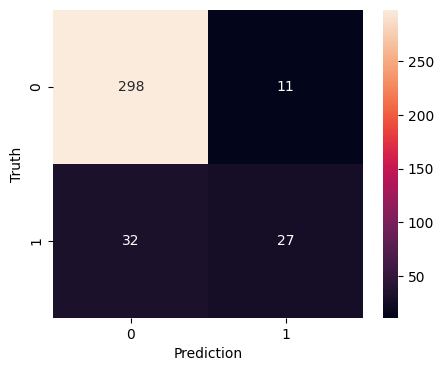

In [689]:
cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

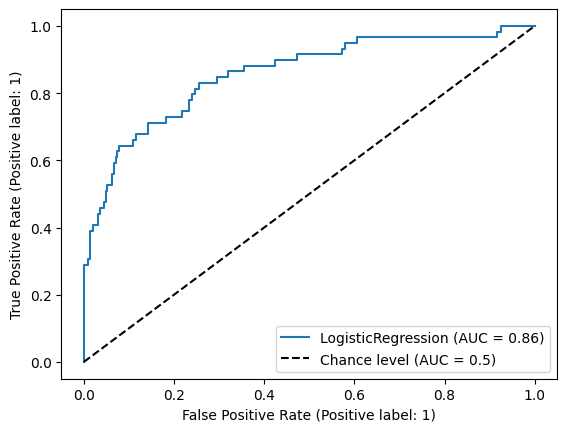

In [690]:
RocCurveDisplay.from_estimator(lr_clf, X_test, y_test, plot_chance_level=True)

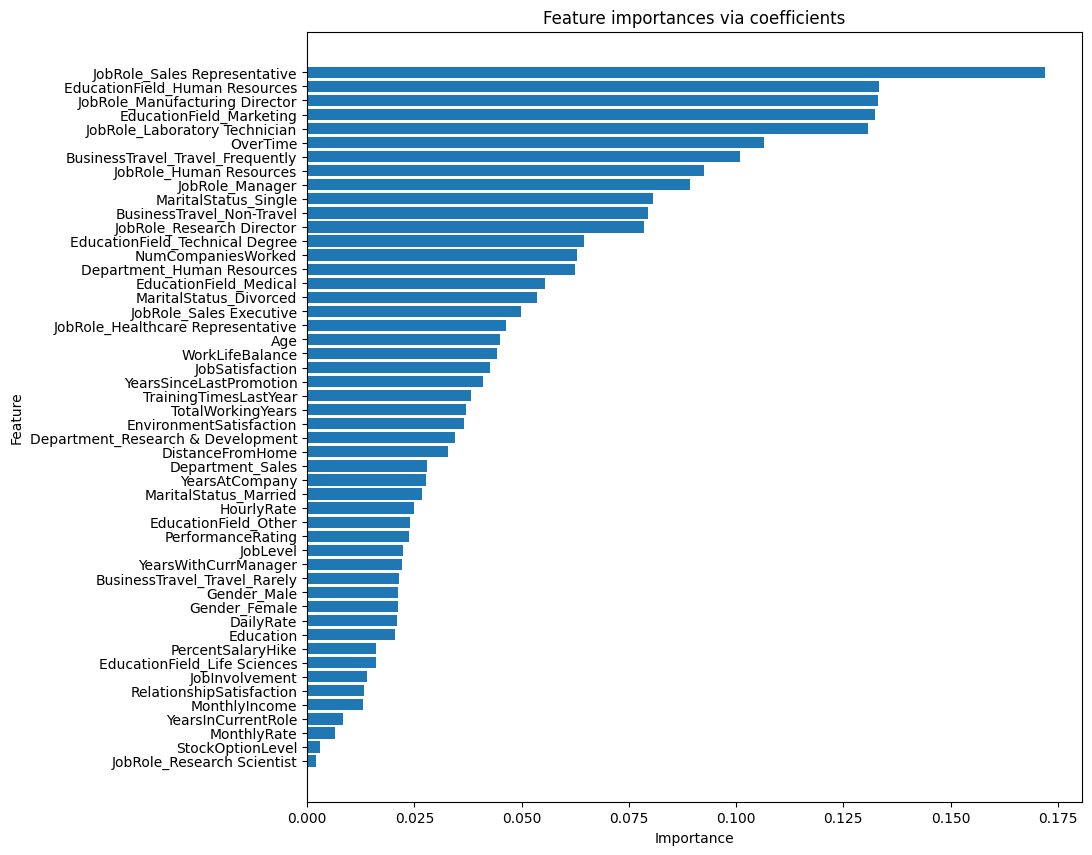

In [691]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_test, y_test)
importance = np.abs(ridge.coef_)
feature_names = np.array(X_test.columns)

# Set a threshold for high importance
threshold = 0.0  

# Filter features with importance higher than the threshold
high_importance_indices = np.where(importance > threshold)[0]
high_importance_values = importance[high_importance_indices]
high_importance_features = feature_names[high_importance_indices]

# Sort features and values based on importance values
sorted_indices = np.argsort(high_importance_values)
high_importance_values_sorted = high_importance_values[sorted_indices]
high_importance_features_sorted = high_importance_features[sorted_indices]

plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.barh(y=high_importance_features_sorted, width=high_importance_values_sorted) 
plt.title("Feature importances via coefficients")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<p style="background-color:#FDEBD0;"><b>Comment:</b> Given the unbalanced nature of the dataset, recall, F1 and presicion scores of the 'left' attrition class are specifically indicative of the model performance. Overall, when the model predicted 'left' category, it did so correctly only in 71% of cases. Out of all 'left' cases in the data, the model identified only 46%, the remaining 54% cases failed to be captured. The performance of the logistic regression model might have been influenced by non-normality of the data, a larger number of categorical features, and possibly complex nonlinear relationships between variables and multicollinearity I have pointed out in the EDA.</p>

<p style="background-color:#FDEBD0;"><b>Comment:</b> Logistic regression estimates the coefficients for each feature, providing insight into feature importance. Interestingly, the model has shown the categorical variables as having the highest importance. Among these, job roles such as sales representative, manufacturing director or laboratory technitian had the highest coefficients, followed by factors like working overtime, or the single marital status. This is in line with the patterns observed in EDA. Other factors highlighted in EDA, such as Age, TotalWorkingYears were lwer in the feature importance scale, while, interestingly, MonthlyIncome was among factors with lowest coeffcient value. This may be due to the relationship between these features and the target variable which may not be well approximated by linear boundaries. </p>

<h3 style="background-color:#EBF5FB; color:#2471A3;">Random Forest Classifier</h3>

In [692]:
rf_clf = RandomForestClassifier(random_state=123)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [693]:
rf_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       309
           1       0.92      0.19      0.31        59

    accuracy                           0.87       368
   macro avg       0.89      0.59      0.62       368
weighted avg       0.87      0.87      0.83       368



Text(33.22222222222222, 0.5, 'Truth')

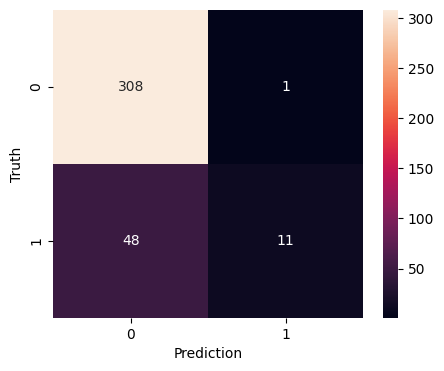

In [694]:
cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

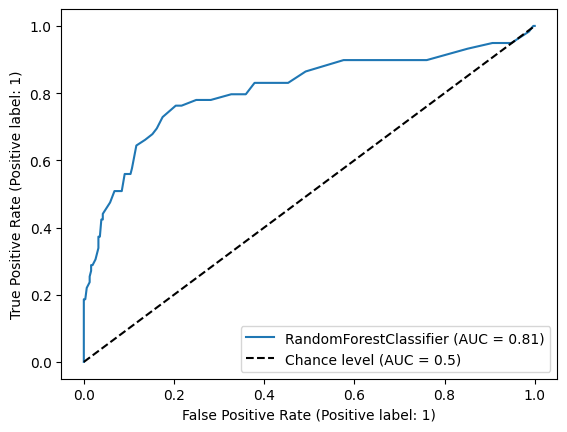

In [695]:
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, plot_chance_level=True)

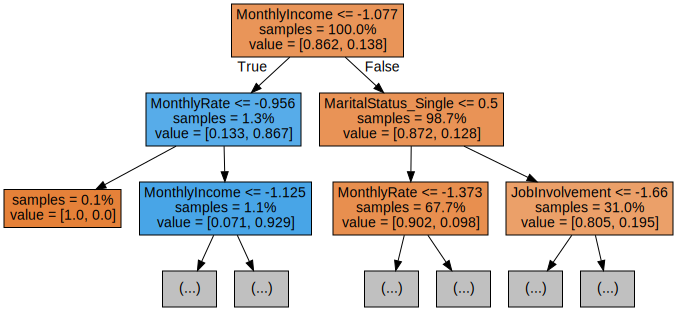

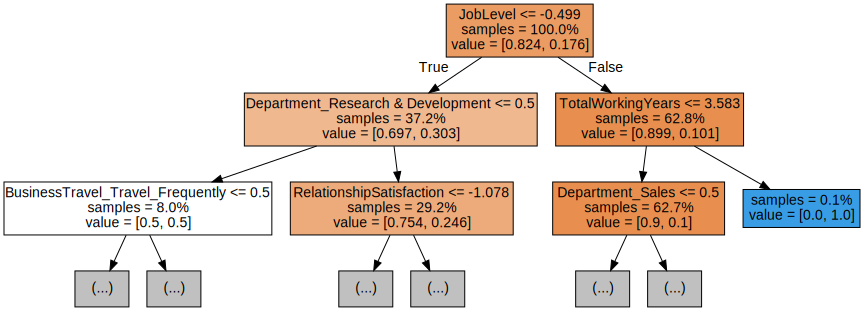

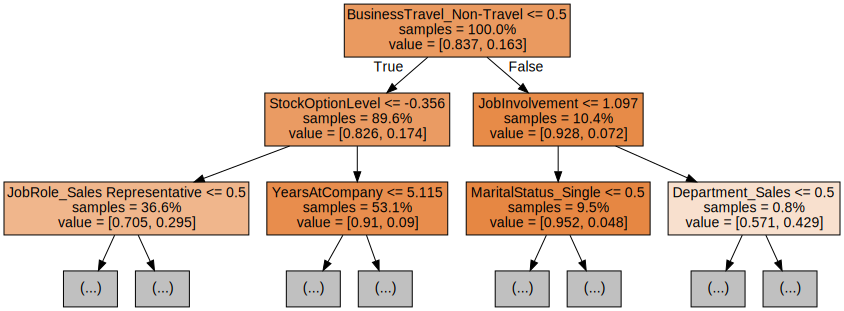

In [696]:
# Export the first three decision trees from the forest
for i in range(3):
    tree = rf_clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<Axes: >

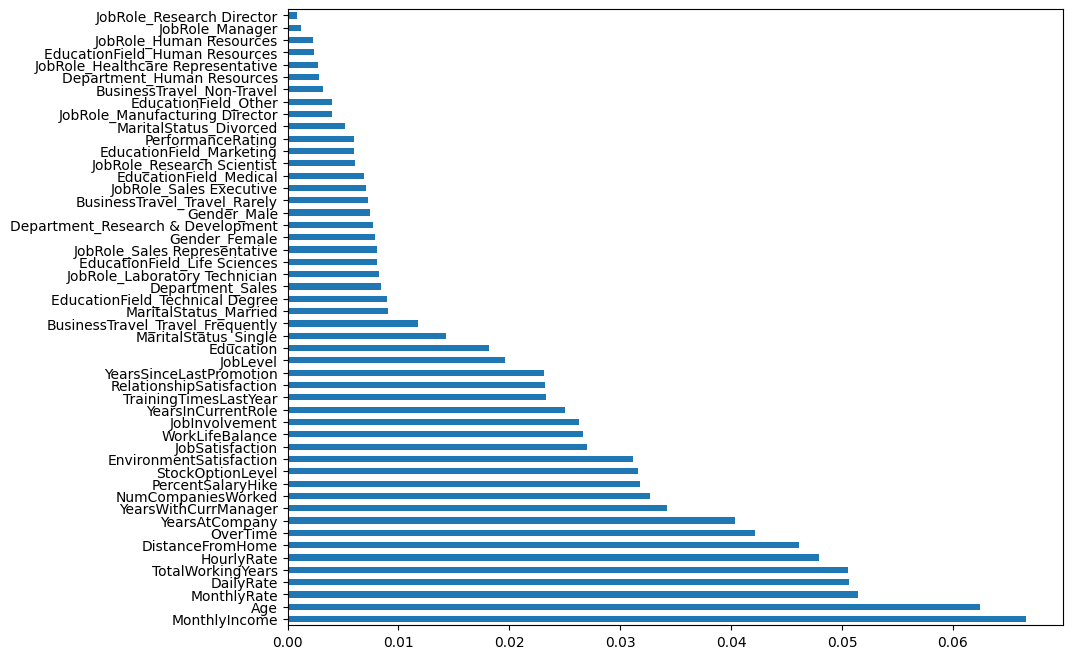

In [697]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.barh(figsize=(10, 8))

<p style="background-color:#FDEBD0;"><b>Comment:</b> Given the unbalanced nature of the dataset, recall, F1 and presicion scores of the 'left' attrition class are specifically indicative of the model performance. Overall, the model performed very poorly and considerably worse than the logistic regression model. While it correctly marked 92% of cases which it predicted to belong to 'left' category, it missed to identify more than 80% of true positives. The performance of the Random Forest model might have been influenced by the training data size, as Random Forests typically require larger datasets to capture complex patterns effectively. Additionally, the underperformance of Random Forests compared to Logistic Regression may stem from the hyperparameters not tuned effectively, e.g. the correct assignment of weights to minority class sample.</p>

<p style="background-color:#FDEBD0;"><b>Comment:</b> Random forests provide a measure of feature importance based on how much each feature reduces impurity across all decision trees in the ensemble. Interestingly, compared to Logistic Regression, the model has favoured continuous variables as having the largest importance in reducring impurity. Among these, MonthlyIncome and Age had the highest importance contrasting with Logistic Regression where they were situated among features of least importance. Again, this discrepancy might be due to predominantly complex and non-linear relationships between these features and Attrition. OverTime was among features of higher importance in both Logistic Regression and Random Forests.</p>

<h3 style="background-color:#EBF5FB; color:#2471A3;">Dense Artifitial Neural Networks</h3>

In [698]:
ann_clf = tf.keras.models.Sequential()
ann_clf.add(tf.keras.layers.Input(shape=(50, )))
ann_clf.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [699]:
ann_clf.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 500)            │        25,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 527,001 (2.01 MB)

 Trainable params: 527,001 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [700]:
ann_clf.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [701]:
epochs_hist = ann_clf.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8285 - loss: 0.4624 
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8885 - loss: 0.2931
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9090 - loss: 0.2510
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9325 - loss: 0.1947
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9534 - loss: 0.1422
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.1028
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9761 - loss: 0.0668
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0329
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9942 - loss: 0.0256
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0128
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9980 - loss: 0.0074
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [702]:
y_pred = ann_clf.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [703]:
y_pred = (y_pred > 0.5) 

In [704]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss'])

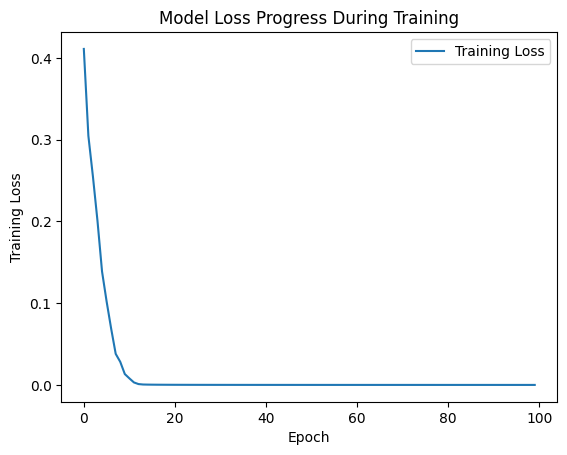

In [705]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

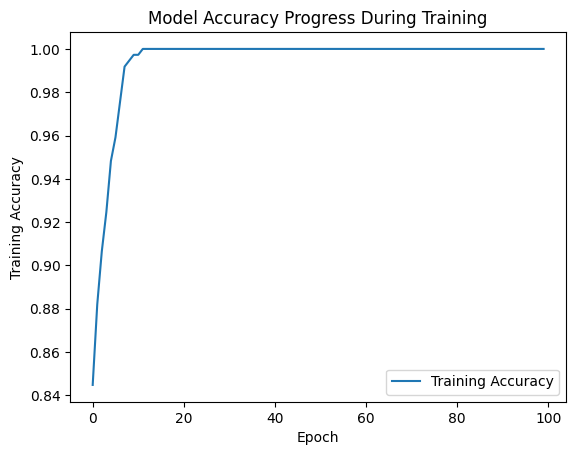

In [706]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

Text(33.22222222222222, 0.5, 'Truth')

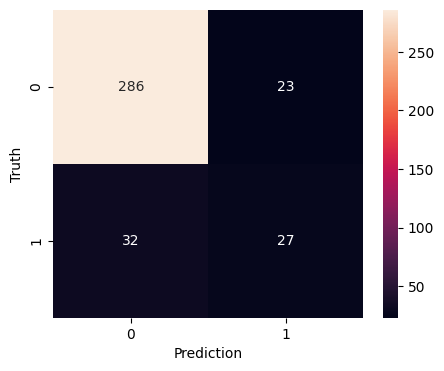

In [707]:
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [708]:
ann_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       309
           1       0.54      0.46      0.50        59

    accuracy                           0.85       368
   macro avg       0.72      0.69      0.70       368
weighted avg       0.84      0.85      0.85       368



<p style="background-color:#FDEBD0;"><b>Comment:</b> Given the unbalanced nature of the dataset, recall, F1 and presicion scores of the 'left' attrition class are specifically indicative of the model performance. Overall, the model performed comparably to Logistic Regression. the ANNs correctly marked only slightly more than a half of the cases which it predicted to belong to 'left' Attrition category. Similarly, it missed to identify around a half of true positives. One of the hypothetized reasons of the low performance of the Logistic Regression model was the possibility of complex non-linear relationships among variables that the regression model is unfit to campure. Neural networks, on the other hand, excel at capturing non-linear relationships in data. However, given the comparable performance of the the models, complex non-linear relationships between the features and Attrition may not be an important factor to be considered in model building. Still, the ANNs may suffer from small training datasats leading to poor performace, such that the complexity of the relationships between features might not have been well capured even if it exists.</p>

<h2 style="background-color:#EBF5FB; color:#2471A3;">Model bulding with correcting for class imbalance via SMOTENC</h2>

<h3 style="background-color:#EBF5FB; color:#2471A3;">Logistic Regression</h3>

In [709]:
lr_clf_sm = LogisticRegression(max_iter=1000)
lr_clf_sm.fit(X_train_sm, y_train_sm)

y_pred = lr_clf_sm.predict(X_test)

In [710]:
lr_sm_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       309
           1       0.58      0.49      0.53        59

    accuracy                           0.86       368
   macro avg       0.74      0.71      0.73       368
weighted avg       0.85      0.86      0.86       368



Text(33.22222222222222, 0.5, 'Truth')

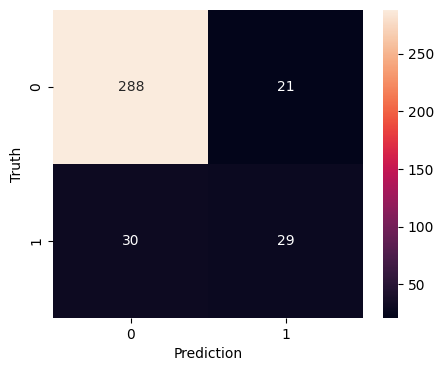

In [711]:
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<h3 style="background-color:#EBF5FB; color:#2471A3;">Random Forest Classifier</h3>

In [712]:
rf_clf_sm = RandomForestClassifier()
rf_clf_sm.fit(X_train_sm, y_train_sm)

y_pred = rf_clf_sm.predict(X_test)

In [713]:
rf_sm_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       309
           1       0.68      0.29      0.40        59

    accuracy                           0.86       368
   macro avg       0.78      0.63      0.66       368
weighted avg       0.85      0.86      0.84       368



Text(33.22222222222222, 0.5, 'Truth')

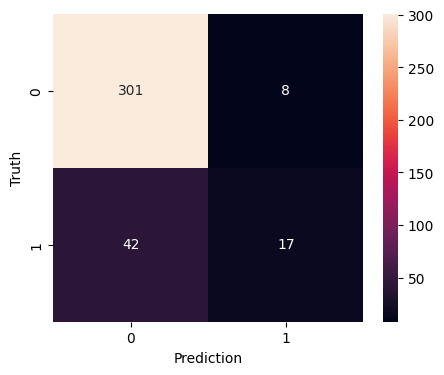

In [714]:
cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

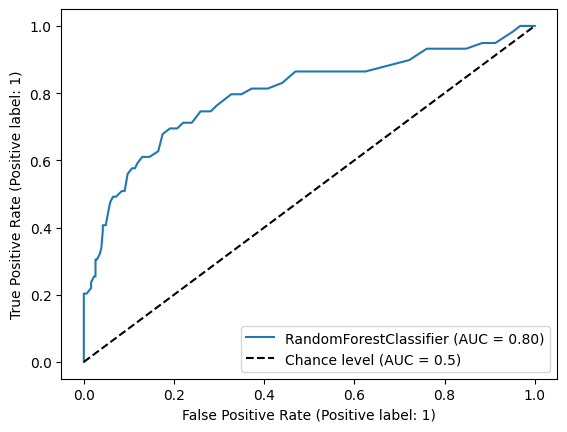

In [715]:
RocCurveDisplay.from_estimator(rf_clf_sm, X_test, y_test, plot_chance_level=True)

<Axes: >

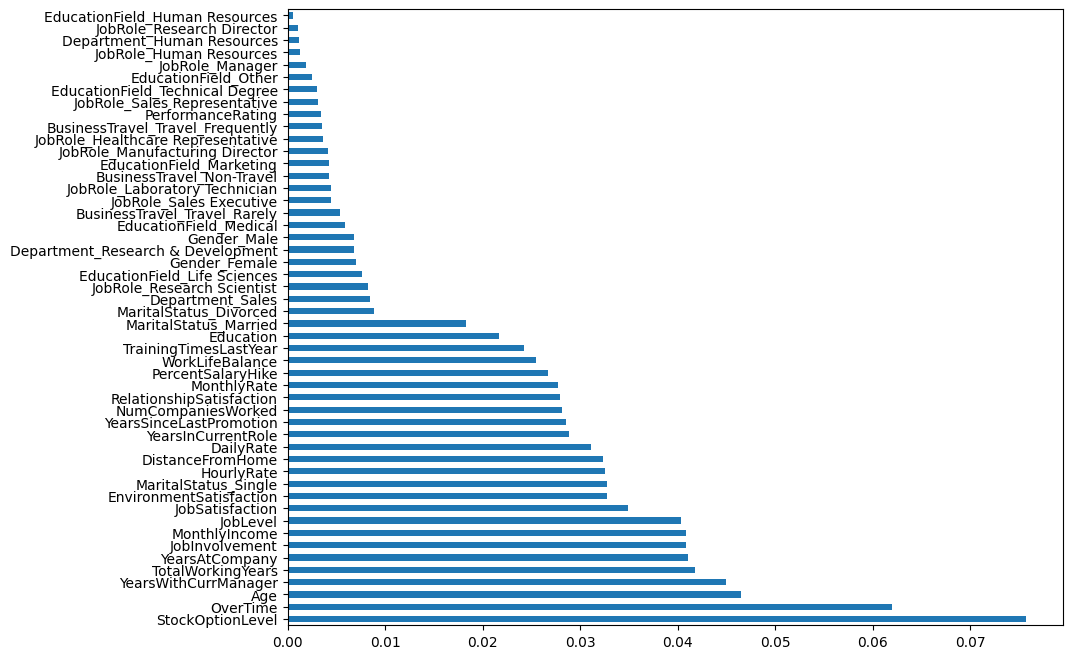

In [716]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_clf_sm.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.barh(figsize=(10, 8))

<h3 style="background-color:#EBF5FB; color:#2471A3;">Dense Artifitial Neural Networks</h3>

In [717]:
ann_clf_sm = tf.keras.models.Sequential()
ann_clf_sm.add(tf.keras.layers.Input(shape=(50, )))
ann_clf_sm.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann_clf_sm.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann_clf_sm.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann_clf_sm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [718]:
ann_clf_sm.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [719]:
epochs_hist = ann_clf_sm.fit(X_train_sm, y_train_sm, epochs = 100, batch_size = 50)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7548 - loss: 0.5100
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8928 - loss: 0.2667
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9406 - loss: 0.1735
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9535 - loss: 0.1263
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.0780
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9779 - loss: 0.0640
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0296
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9977 - loss: 0.0097
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0187
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9993 - loss: 0.0049
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [720]:
y_pred = ann_clf_sm.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [721]:
y_pred = (y_pred > 0.5) 

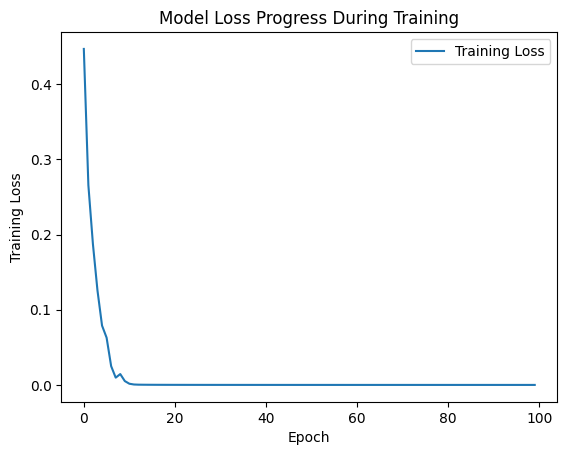

In [722]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

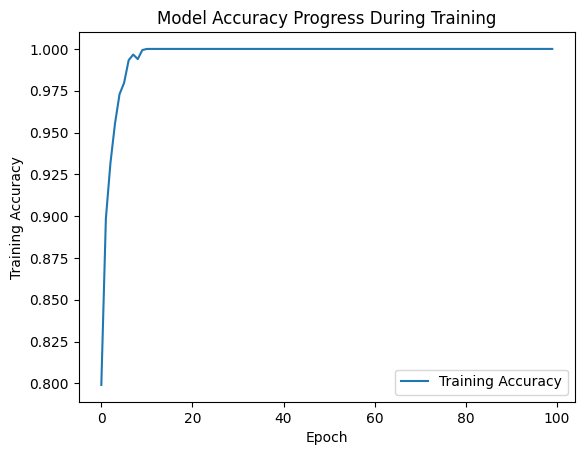

In [723]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

In [724]:
ann_sm_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       309
           1       0.54      0.44      0.49        59

    accuracy                           0.85       368
   macro avg       0.72      0.68      0.70       368
weighted avg       0.84      0.85      0.84       368



Text(33.22222222222222, 0.5, 'Truth')

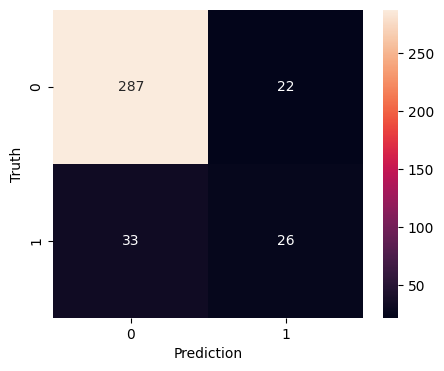

In [725]:
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<h1 style="background-color:#EBF5FB; color:#2471A3;">Model comparison</h1>

In [735]:
# Generate a table of performance scores of all models corresponding to class 'left' of Attrition
reports = [lr_report, rf_report, ann_report, lr_sm_report, rf_sm_report, ann_sm_report]
labels = ['LogReg', 'RandFor', 'ANNs', 'LogReg_balanced', 'RandFor_balanced', 'ANNs_balanced'] 

report_table = {}
for i in range(len(reports)):
    report_table[labels[i]] = {}
    report_table[labels[i]]['precision'] = round(reports[i]['1']['precision'], 2)
    report_table[labels[i]]['recall'] = round(reports[i]['1']['recall'], 2)
    report_table[labels[i]]['f1-score'] = round(reports[i]['1']['f1-score'], 2)

In [736]:
report_table = pd.DataFrame(report_table)

In [737]:
report_table

,LogReg,RandFor,ANNs,LogReg_balanced,RandFor_balanced,ANNs_balanced
precision,0.71,0.92,0.54,0.58,0.68,0.54
recall,0.46,0.19,0.46,0.49,0.29,0.44
f1-score,0.56,0.31,0.50,0.53,0.40,0.49


<p style="background-color:#FDEBD0;"><b>Comment:</b> SMOTENC-based balancing of the dataset has improved the performace of Random Forest Classifier's recall and F1 scores considerably, however, without outperforming the other two models. Both Logistic Regression and ANNs recall scores did not increase in performance by applying SMOTENC. Both models can handle class imbalance by adjusting class weights compared to Random Forests. They likely learned better representations of the minority class, which SMOTENC-based balancing did not improve. 
To enhance predictive accuracy of the Logistic Regression model, future steps involve identifying and engineering informative features that capture relevant information from the data, e.g using PCA to reduce collinearity and dimensionality.</p>